# Project Overview

#### This project examines employee data from Nexora Tech, a growing tech company based in India. Recently the company has had high turnover for female staff, hence analysis into potential biases and inequality toward women are warranted. Our primary objective is to understand the causes of high female employee turnover. Insights will ultimately support HR recruitment in ensuring equity of pay, promoting diversity in the work culture, and fostering an inclusive environment. 

# Executive Summary

# Data description

#### Kaggle Link --> https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

# Loading data, checking for NAs, and quick visualisations

In [2]:
# Import libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Download data from Kaggle
path_data1 = kagglehub.dataset_download("tawfikelmetwally/employee-dataset")
path_data2 = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

data1 = pd.read_csv(path_data1 + "/employee.csv")
data2 = pd.read_csv("C:/Users/janus/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1/WA_Fn-UseC_-HR-Employee-Attrition.csv")

c:\Users\janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Quick view of the data
data1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
# Check for missing values
data1.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
data1.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<Axes: xlabel='JoiningYear', ylabel='count'>

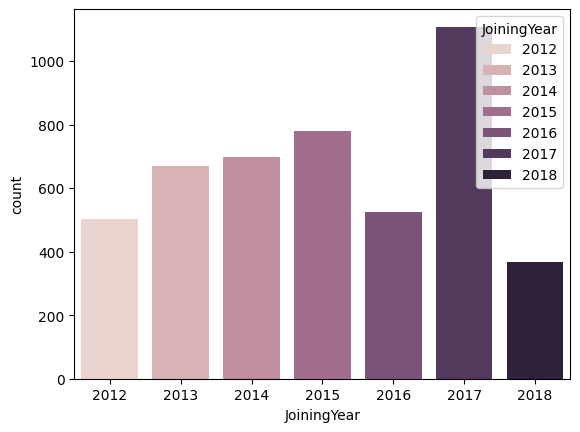

In [6]:
# number of new hires yearly
sns.countplot(x = data1["JoiningYear"], hue = data1["JoiningYear"]) 

### - Near significant relationship between number of new hires a year and the difference between male and female new hires (p = .07), however, limited data regarding this insight

# New Hires

<Axes: title={'center': 'New Hires per year by gender'}, xlabel='Number of new hires', ylabel='Year'>

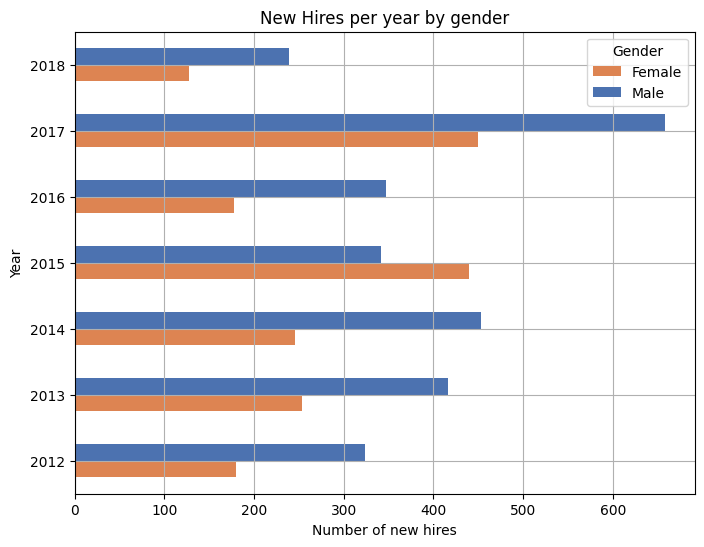

In [7]:
# Plot New hires by gender

newhiresperyear = data1.groupby(["JoiningYear"])['Gender'].value_counts()
newhiresperyear

newhiresperyear.unstack().plot(kind='barh',
                               stacked=False, figsize=(8, 6),
                               title="New Hires per year by gender", ylabel="Year",
                               xlabel="Number of new hires",
                               color=["#DD8452", "#4C72B0"],
                               grid=True)


## The difference between male and female new hires yearly

[-18.8, -24.4, -29.6, -32.2, -12.7, -28.6, -30.2]
-23.8


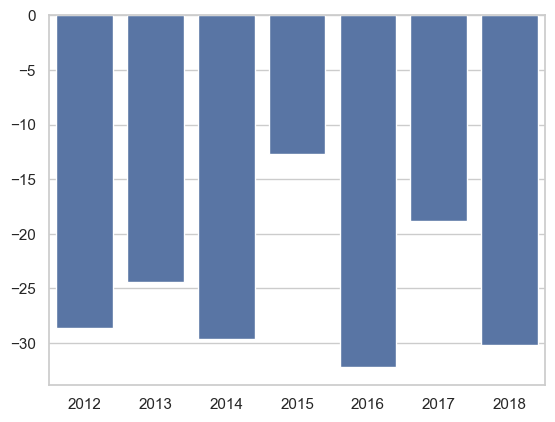

In [ ]:
# Plot and calculate the differnece between male and female new hires yearly

# Define function for calculating percentage difference in the number of male / female employees

def percentage_difference(data):
    
    # Total number of employees
    total_count = len(data)
    # Count by gender
    gender_counts = data["Gender"].value_counts()
    # Calculate percentage difference
    gender_counts_percentage = (gender_counts / total_count) * 100
    perc = round(gender_counts_percentage.diff().iloc[-1],1)  
    
    return perc

# initialise list to contain percentage difference over years
perc_diff = []

# iterate through years and calculate percentage difference
years = data1["JoiningYear"].unique()

for year in years:
    data = data1[data1["JoiningYear"] == year]
    perc = percentage_difference(data)
    perc_diff.append(perc)

print(perc_diff)

# Plot percentage difference over the years 
sns.set_theme(style="whitegrid")
sns.barplot(x = years, y = perc_diff)

# Calculate the average percentage difference for the past three years
perc_diff_subs = perc_diff[-3:]
print(round(np.mean(perc_diff_subs),1))


<Axes: xlabel='count', ylabel='perc_diff'>

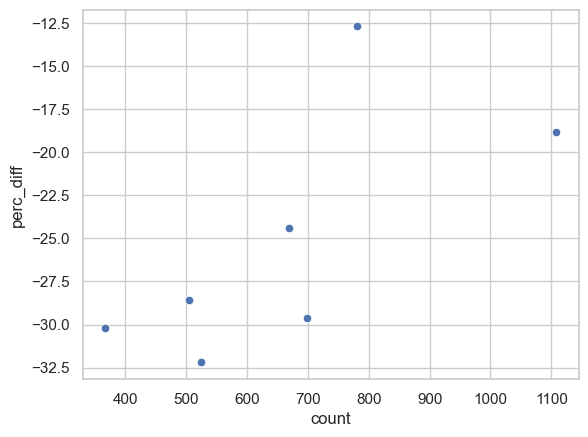

In [ ]:
# Veiwnig the same data as a scatter point, shows a weak positive relationship
newhiresyearly = data1["JoiningYear"].value_counts(sort=False)
newhiresyearly = pd.DataFrame(newhiresyearly)
newhiresyearly["perc_diff"] = perc_diff

sns.scatterplot(x = newhiresyearly["count"], y = newhiresyearly["perc_diff"])


<Axes: title={'center': 'New Hires per year by gender'}, xlabel='Number of new hires', ylabel='Year'>

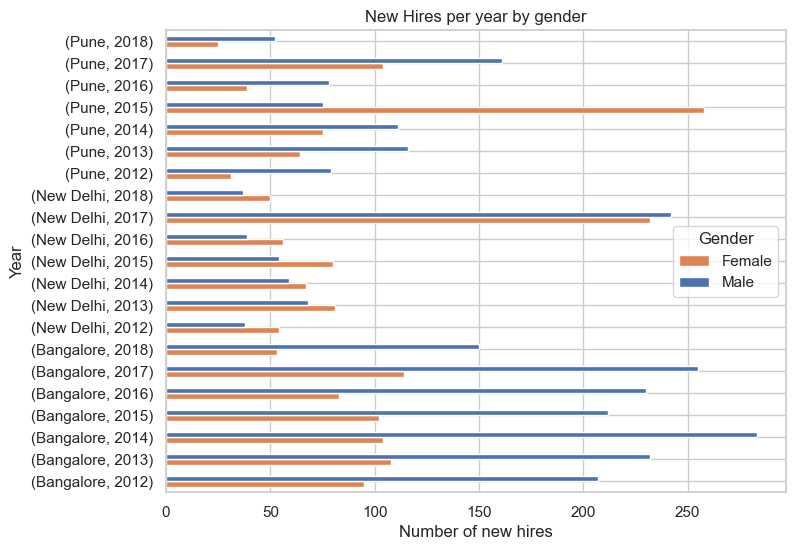

In [13]:
gender_new_hires_by_city = data1.groupby(["City","JoiningYear"])["Gender"].value_counts()

gender_new_hires_by_city.unstack().plot(kind='barh',
                               stacked=False, figsize=(8, 6),
                               title="New Hires per year by gender", ylabel="Year",
                               xlabel="Number of new hires",
                               color=["#DD8452", "#4C72B0"],
                               grid=True)

# Turnover

In [5]:
# Calculate turnover 

turnover_by_gender = data1.groupby(["Gender"])["LeaveOrNot"].value_counts()

males = data1[data1["Gender"] == "Male"]
females = data1[data1["Gender"] == "Female"]

maleturnover = round((turnover_by_gender[3] / len(males))*100,0)
femaleturnover = round((turnover_by_gender[1] / len(females))*100,0)

print(maleturnover, femaleturnover)

# Turnover_by_gender
# 47%, and 25%


26.0 47.0


C:\Users\janus\AppData\Local\Temp\ipykernel_16540\225038753.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maleturnover = round((turnover_by_gender[3] / len(males))*100,0)
C:\Users\janus\AppData\Local\Temp\ipykernel_16540\225038753.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  femaleturnover = round((turnover_by_gender[1] / len(females))*100,0)


<Axes: title={'center': 'Male and female employees resigning by year'}, xlabel='Year', ylabel='Number of resignations'>

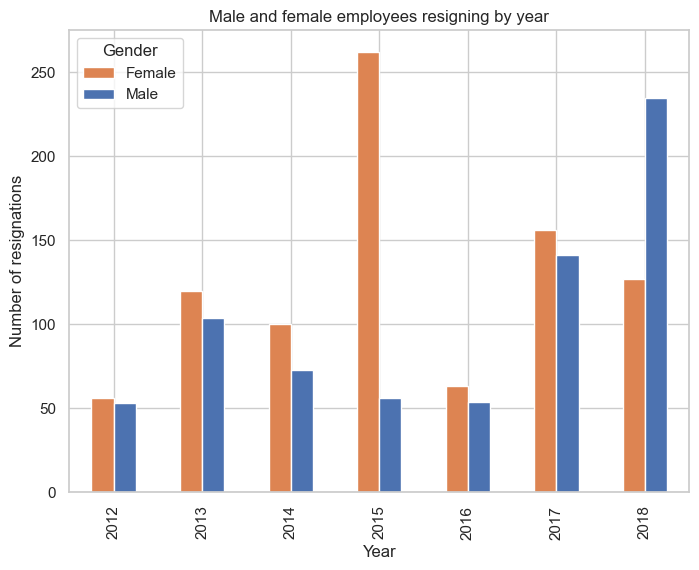

In [12]:
# Compare the number of male and female employees resigning by year

left = data1[data1["LeaveOrNot"] == 1]
gender_resignation_by_year = left.groupby(['JoiningYear'])["Gender"].value_counts()

gender_resignation_by_year.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and female employees resigning by year", ylabel="Number of resignations",
                               xlabel="Year",
                               color=["#DD8452", "#4C72B0"],                             
                               grid=True)

# 2015 is an outlier with x5 times more women leaving the organisation than men
# Lets recalulate the turnover rate without 2015 data

In [ ]:
# It looks like 2015 had abnormally hihg turnover rates, lets remove it and recalculate the turnover rates
data1_no2015 = data1[data1["JoiningYear"] != 2015]

turnover_by_gender_no2015 = data1_no2015.groupby(["Gender"])['LeaveOrNot'].value_counts()
turnover_by_gender_no2015

males = data1_no2015[data1_no2015["Gender"] == "Male"]
females = data1_no2015[data1_no2015["Gender"] == "Female"]

maleturnover_r = round((turnover_by_gender_no2015.iloc[3] / len(males))*100,0)
femaleturnover_r = round((turnover_by_gender_no2015.iloc[1] / len(females))*100,0)

print("Male turnover rate: ", maleturnover_r, "\nFemale turnover rate: ", femaleturnover_r)

# Despite accounting for the outlier year, the overall turnover rates stay very similar

Male turnover rate:  27.0 
Female turnover rate:  43.0


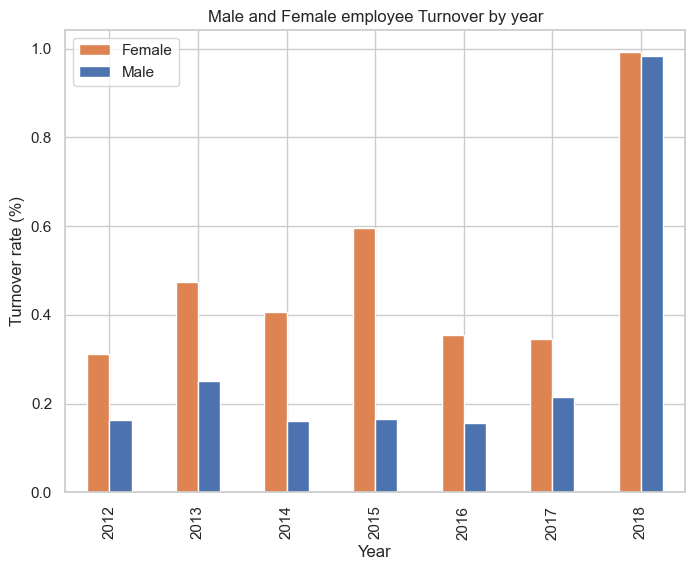

In [ ]:
# Plot gender turnover rate by year?

gender_turnover_by_year = data1.groupby(['JoiningYear',"Gender"]).agg({"LeaveOrNot": "mean"})
gender_turnover_by_year

gtby = gender_turnover_by_year.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and Female employee Turnover by year", ylabel="Turnover rate (%)",
                               xlabel="Year",
                               color=["#DD8452", "#4C72B0"],                             
                               grid=True)

gtby.legend(labels=["Female","Male"])

## Influence of branch on turnover

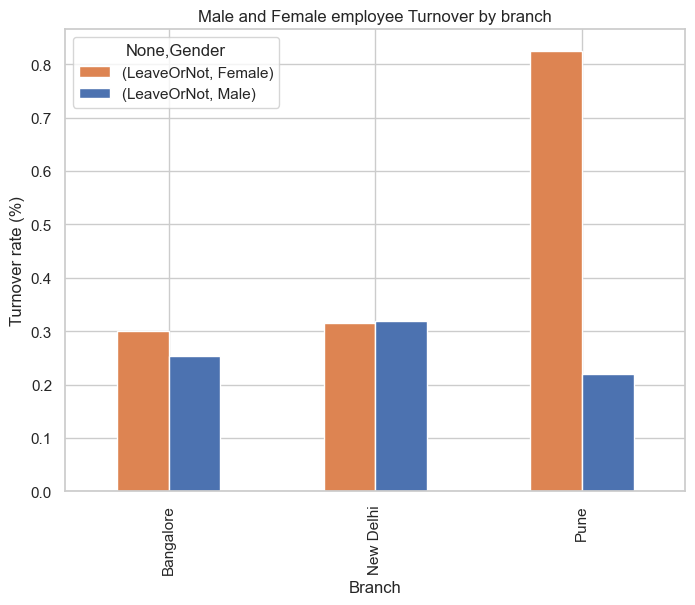

In [15]:
# Overall Gender turnover by branch

gender_turnover_by_branch = data1.groupby(['City',"Gender"]).agg({"LeaveOrNot": "mean"})

gtbb = gender_turnover_by_branch.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and Female employee Turnover by branch", ylabel="Turnover rate (%)",
                               xlabel="Branch",
                               color=["#DD8452", "#4C72B0"],                             
                               grid=True)


## Influence of Education on turnover

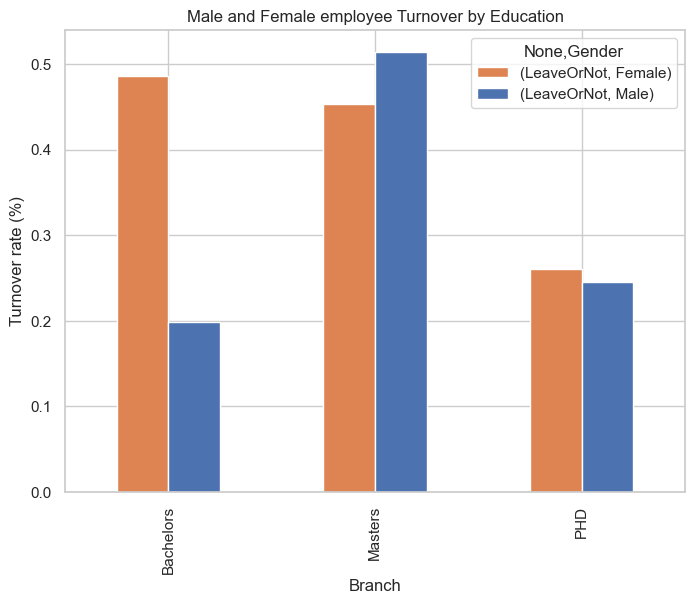

In [17]:
# turnover by education 

gender_turnover_by_edu = data1.groupby(['Education',"Gender"]).agg({"LeaveOrNot": "mean"})

gtbe = gender_turnover_by_edu.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and Female employee Turnover by Education", ylabel="Turnover rate (%)",
                               xlabel="Branch",
                               color=["#DD8452", "#4C72B0"],                             
                               grid=True)


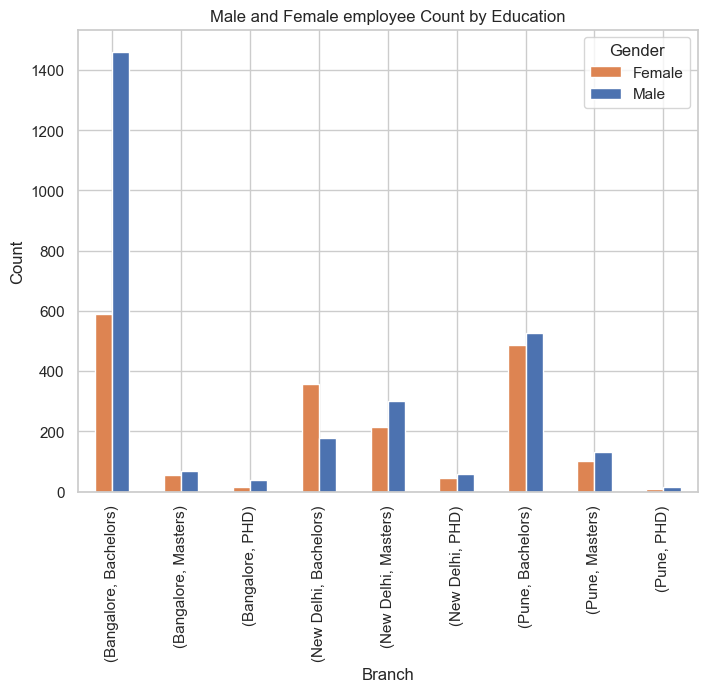

In [ ]:
# Visualising educatoin and branch togather with gender turnover 
gender_education_by_branch = data1.groupby(['City',"Education"])["Gender"].value_counts()

gebb = gender_education_by_branch.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and Female employee Count by Education", ylabel="Count",
                               xlabel="Branch",
                               color=["#DD8452", "#4C72B0"],                             
                               grid=True)

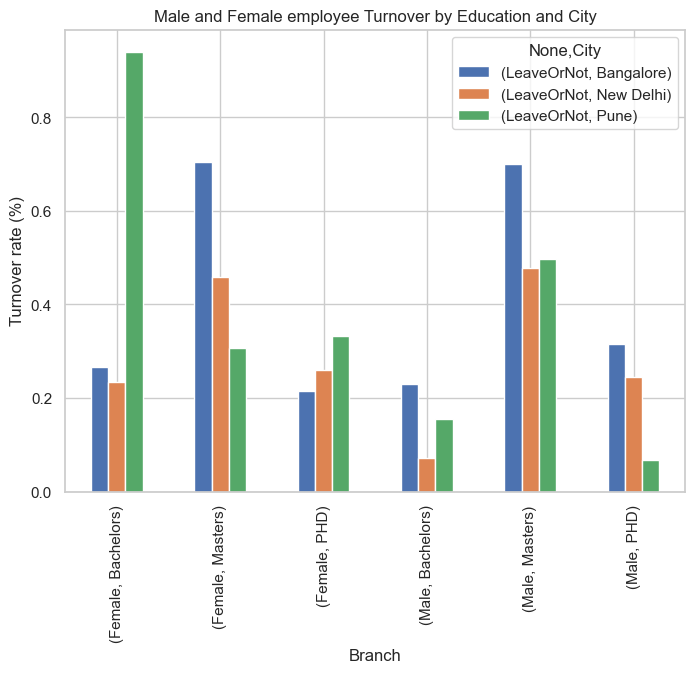

In [ ]:
# The same plot, but in a slightly more intuitive way

gender_turnover_by_edu_city = data1.groupby(['Gender',"Education","City"]).agg({"LeaveOrNot": "mean"})

gtbec = gender_turnover_by_edu_city.unstack().plot(kind='bar',
                               stacked= False, figsize=(8, 6),
                               title="Male and Female employee Turnover by Education and City", ylabel="Turnover rate (%)",
                               xlabel="Branch",
                               grid=True)


# Average Gender Pay Gap 

#### And gender split by payment tier

Average Payment Tier for males: 2.81
Average Payment Tier for females: 2.54
Gender pay gap: 9.59%


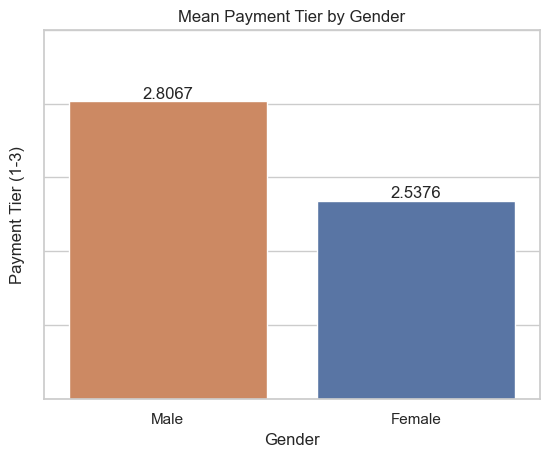

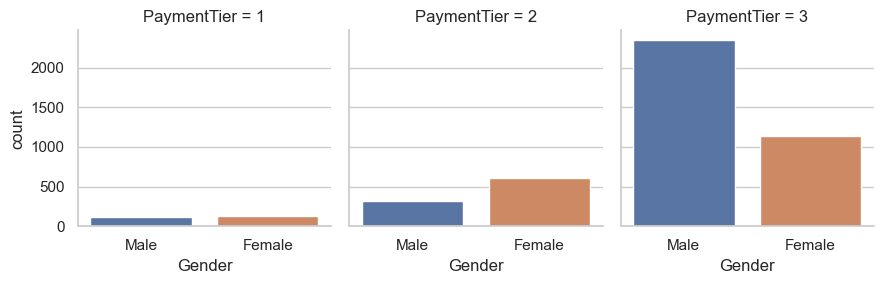

In [7]:
# Calculate the average PaymentTier for each gender, where payment tier is used as an int value
male_payment_tier_mean = data1[data1['Gender'] == "Male"]['PaymentTier'].mean()
print(f"Average Payment Tier for males: {round(male_payment_tier_mean, 2)}")
female_payment_tier_mean = data1[data1['Gender'] == "Female"]['PaymentTier'].mean()
gender_pay_gap = (male_payment_tier_mean - female_payment_tier_mean) / male_payment_tier_mean * 100
print(f"Average Payment Tier for females: {round(female_payment_tier_mean, 2)}")
print(f"Gender pay gap: {round(gender_pay_gap,2)}%")

# Plotting bars as male first then female second
gender_order = ["Male", "Female"]

# Plot the mean PaymentTier by Gender
payment_tier_by_gender_av = data1.groupby('Gender')['PaymentTier'].mean()

sns.set_theme(style="whitegrid")
meanpay = sns.barplot(x = payment_tier_by_gender_av.index,y = payment_tier_by_gender_av,hue=payment_tier_by_gender_av.index, order=gender_order)
meanpay.set_title("Mean Payment Tier by Gender")
meanpay.set_ylim(2, 3)
meanpay.set_ylabel("Payment Tier (1-3)")
meanpay.set(yticklabels=[])

# Add labels to the bars
for i in meanpay.containers:
    meanpay.bar_label(i,)

# Plot individual payment tiers by gender
grid = sns.FacetGrid(data1, col = "PaymentTier", hue="Gender")
grid.map(sns.countplot,"Gender", order = gender_order)

## Median Gender Pay Gap


In [21]:
# Working out median gender pay gap

male_pay = data1[data1['Gender'] == "Male"]['PaymentTier'].median()
female_pay = data1[data1['Gender'] == "Female"]['PaymentTier'].median()
Median_Average_Pay = male_pay - female_pay

print("Median Average Pay: ", Median_Average_Pay)

Median Average Pay:  0.0


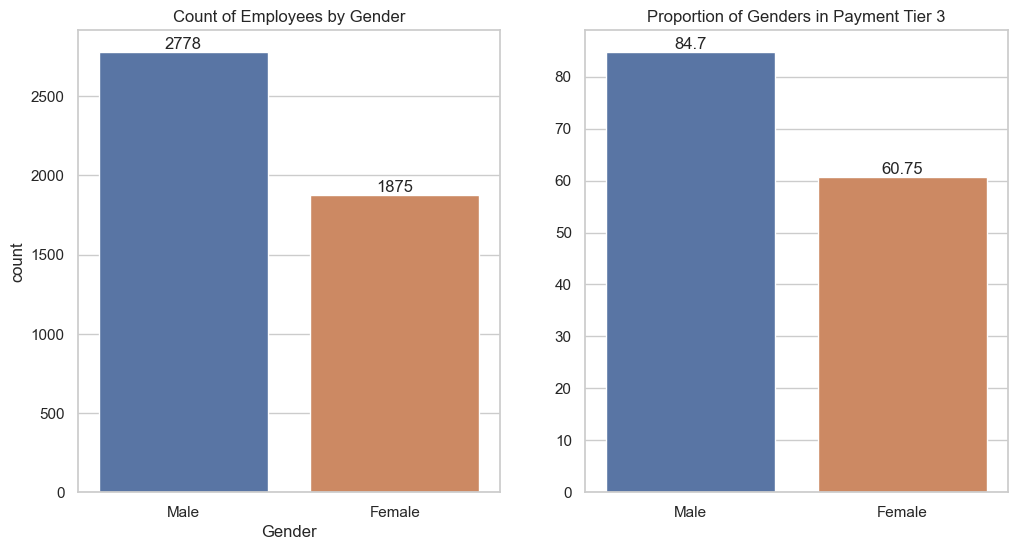

In [ ]:
# Plotting tier 3 payment in more detail

# Set up multi plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count number of employees by gender 
sns.countplot(x = data1["Gender"],hue= data1["Gender"], order=gender_order,ax=axes[0])
# axes[0].set_ylim(1500, 3000)
axes[0].set_title("Count of Employees by Gender")

# Add labels to the bars
for i in axes[0].containers:
   axes[0].bar_label(i,)
    
# Plot proportion of total men/women at the company in tier 3
data1t3 = data1[(data1["PaymentTier"] == 3)]
t3counts = data1t3["Gender"].value_counts() 
counts = data1["Gender"].value_counts() 
mentprop = round((t3counts.iloc[0] /  counts.iloc[0])*100,2)
femaleprop = round((t3counts.iloc[1] / counts.iloc[1])*100,2)

props = [mentprop, femaleprop]
sns.barplot(x = gender_order, y = props, ax=axes[1],hue=gender_order)

# axes[1].set_ylim(50, 100)
axes[1].set_title("Proportion of Genders in Payment Tier 3")

# Add labels to the bars
for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

## Effect of branch on pay by gender

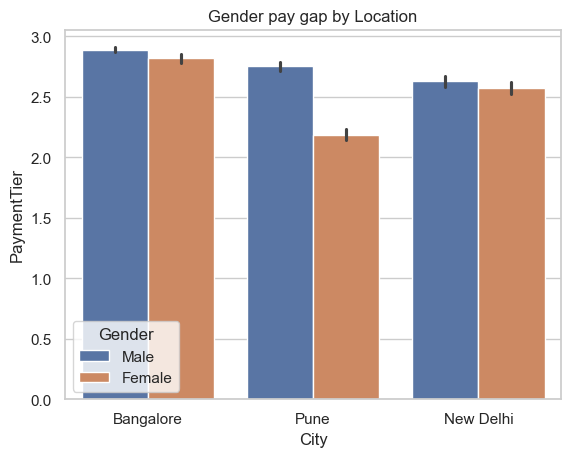

In [23]:
# Calculate the average PaymentTier for each city, grouped by gender
payment_tier_by_gender_location = data1.groupby(["Gender","City"])['PaymentTier'].mean()
payment_tier_by_gender_location

# We can see that the pay gap may be driven by differences in the Pune branch
paybylocation = sns.barplot(x=data1["City"],y=data1["PaymentTier"],hue=data1["Gender"])
paybylocation.set_title("Gender pay gap by Location")
plt.show()

## Gender pay by branch and year 

['Pune', 'Bangalore', 'NewDelhi']


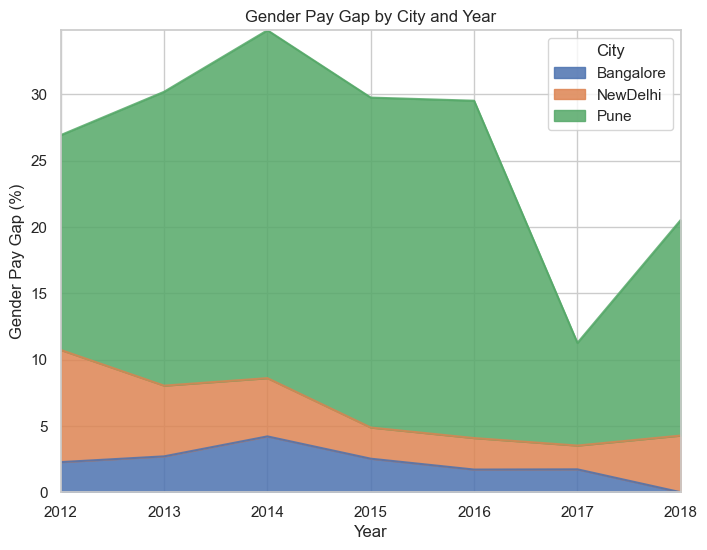

In [24]:
# Plot and calculate the differnece between male and female pay by year for each city

data1["City_new"] = data1["City"].str.replace("New Delhi","NewDelhi", case=True)

Pune = data1[data1["City_new"] == "Pune"]
Bangalore = data1[data1["City_new"] == "Bangalore"]
NewDelhi = data1[data1["City_new"] == "NewDelhi"]

cities = {"Pune": Pune
          ,"Bangalore": Bangalore
          ,"NewDelhi": NewDelhi}

indexes = list(cities.keys())

print(indexes)

# Define function for calculating gender pay gap over the years
def percentage_difference_pay(data):
    
    # Calculate gendered pay
    gender_pay = data.groupby(["Gender"])["PaymentTier"].mean()
    
    # Gender pay gap
    gender_pay_gap = (gender_pay["Male"] - gender_pay["Female"]) / gender_pay["Male"] * 100
    # Calculate percentage difference
    # Return gender pay gap
    
    if gender_pay_gap < 0:
        return 0
    else:
        return gender_pay_gap


# Initialise list to contain percentage difference over years
gender_pay_gap_byYear = pd.DataFrame(columns=["Year","City","GenderPayGap"])

# Iterate through years and calculate percentage difference
years = data1["JoiningYear"].unique()
years = np.sort(years)

for index, city in enumerate(indexes):
    for i in range(len(years)):
        city_data = cities[city]
        city_data = city_data[city_data["JoiningYear"] == years[i]]
        perc = percentage_difference_pay(city_data)
        gender_pay_gap_byYear.loc[len(gender_pay_gap_byYear)] = [years[i],city,perc]

# # Plot percentage difference over the years 

sns.set_theme(style="whitegrid")
genderpaygap = gender_pay_gap_byYear.groupby(["Year","City"])["GenderPayGap"].mean()

ax = genderpaygap.unstack().plot(kind='area',
                    stacked= True,
                    figsize=(8, 6),
                    title="Gender Pay Gap by City and Year", ylabel="Gender Pay Gap (%)",
                    xlabel="Year",
                    alpha=0.85,                             
                    grid=True)


ax.margins(0)


	Welch Two Sample t-test

data:  PunePay by PuneGender
t = -18.515, df = 1182.8, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is less than 0
95 percent confidence interval:
       -Inf -0.5148189
sample estimates:
mean in group Female   mean in group Male 
            2.187919             2.752976 


<Axes: title={'center': 'Gender count by age'}, xlabel='Age', ylabel='Count'>

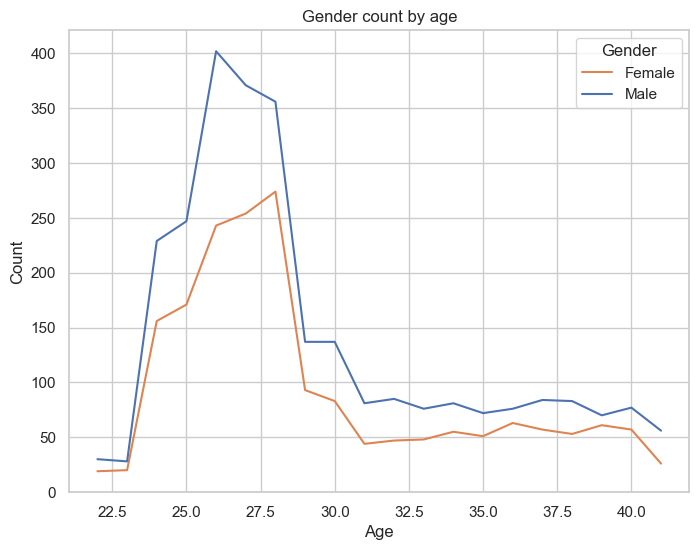

In [ ]:
# Visualising relationship between age, gender and pay? 
# first plot distribution of ages by gender

count_by_age_gender =  data1.groupby(["Age"])["Gender"].value_counts()

count_by_age_gender.unstack().plot(kind='line',
                        stacked= False, figsize=(8, 6),
                        title="Gender count by age", ylabel="Count",
                        xlabel="Age",
                        color=["#DD8452", "#4C72B0"],                             
                        grid=True)


<Axes: title={'center': 'Average payment tier by gender and age'}, xlabel='Age', ylabel='Average Payment Tier'>

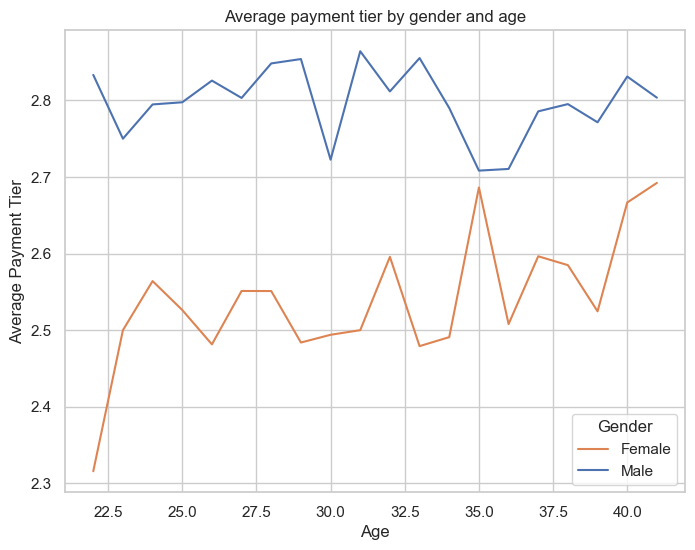

In [10]:
pay_by_age_gender_av =  data1.groupby(["Age","Gender"])["PaymentTier"].mean()

pay_by_age_gender_av.unstack().plot(kind='line',
                        stacked= False, figsize=(8, 6),
                        title="Average payment tier by gender and age", ylabel="Average Payment Tier",
                        xlabel="Age",
                        color=["#DD8452", "#4C72B0"],                             
                        grid=True)

<Axes: title={'center': 'Gender turnover by benched'}, xlabel='Benched', ylabel='Count'>

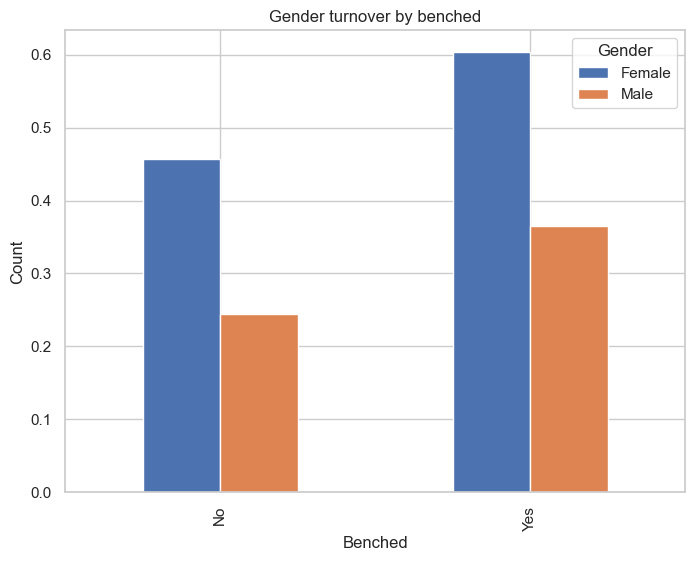

In [30]:
# Check if the employees have been benched

leave_by_gender_by_bench =  data1.groupby(["EverBenched","Gender"])["LeaveOrNot"].mean()
leave_by_gender_by_bench.unstack()

leave_by_gender_by_bench.unstack().plot(kind='bar',
                        stacked= False, figsize=(8, 6),
                        title="Gender turnover by benched", ylabel="Count",
                        xlabel="Benched",
                        # color=["#DD8452", "#4C72B0"],                             
                        grid=True)
